### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 1. URL 찾기

In [3]:
url = "http://corners.gmarket.co.kr/Bestsellers"

In [4]:
# 2. request > response : str(html)

In [5]:
response = requests.get(url)
response

<Response [200]>

In [6]:
# 3. bs > DataFrame

In [7]:
dom = BeautifulSoup(response.text, "html.parser")

In [8]:
# select items
elements = dom.select("#gBestWrap > div.best-list > ul > li")
len(elements)

200

In [9]:
element = elements[0]

In [10]:
# select item data
data = {
    "title": element.select_one(".itemname").text,
    "link": element.select_one(".itemname").get("href"),
    "img": element.select_one("img.image__lazy").get("src"),
    "o_price": element.select_one(".o-price").text,
    "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
}
data

{'title': '[캘리포니아골드뉴트리션](아이허브) 3개X CGN 락토비프 프로바이오틱스 300억 유산균 해외직구',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2902447820&ver=20240308',
 'img': '//gdimg.gmarket.co.kr/2902447820/still/300?ver=1709794767',
 'o_price': '정가85,100원',
 's_price': '할인가68,070원 20%'}

In [11]:
# make DataFrame
datas = []
for element in elements:
    datas.append({
        "title": element.select_one(".itemname").text,
        "link": element.select_one(".itemname").get("href"),
        "img": "http:" + element.select_one("img.image__lazy").get("src"),
        "o_price": element.select_one(".o-price").text,
        "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
    })
df = pd.DataFrame(datas)
df.tail(2)

title  \
198                        [CGV](CGV) 3월 G마켓 예매권(2D)   
199  [코인코즈]30+15 르샵/보니스팍스/나인식스뉴욕 24 S/S 봄 트렌디 아이템 특가   

                                                  link  \
198  http://item.gmarket.co.kr/Item?goodscode=35742...   
199  http://item.gmarket.co.kr/Item?goodscode=28328...   

                                                   img     o_price  \
198  http://gdimg.gmarket.co.kr/3574231940/still/30...   정가15,000원   
199  http://gdimg.gmarket.co.kr/2832851792/still/30...  정가120,000원   

            s_price  
198  할인가10,600원 29%  
199  할인가36,000원 70%

In [12]:
df.head()

title  \
0  [캘리포니아골드뉴트리션](아이허브) 3개X CGN 락토비프 프로바이오틱스 300억 ...   
1  [함소아]비타민D 가득 1000IU 180캡슐 2박스 (12개월 구성)+신제품 생기...   
2  구우스 1+1+1 플라워 빨아쓰는 규조토 발매트 플로럴 트랜디한 3D 일러스트 신상...   
3                [베베쥬]베베쥬 20%+10%쿠폰 무료배송/봄신상 오픈/데일리룩   
4                              부산 대저 짭짤이토마토 2.5kg(S)   

                                                link  \
0  http://item.gmarket.co.kr/Item?goodscode=29024...   
1  http://item.gmarket.co.kr/Item?goodscode=15075...   
2  http://item.gmarket.co.kr/Item?goodscode=33548...   
3  http://item.gmarket.co.kr/Item?goodscode=28998...   
4  http://item.gmarket.co.kr/Item?goodscode=35455...   

                                                 img    o_price  \
0  http://gdimg.gmarket.co.kr/2902447820/still/30...  정가85,100원   
1  http://gdimg.gmarket.co.kr/1507534837/still/30...  정가90,000원   
2  http://gdimg.gmarket.co.kr/3354802448/still/30...  정가30,000원   
3  http://gdimg.gmarket.co.kr/2899878671/still/30...  정가41,000원   
4  http://gdimg.gmarket.co.kr/3545534565/still/30...  정가35,570원   

          s_price  
0  할인가68,070원 20%  
1  할인가59,400원 34%  
2  할인가10,000원 66%  
3  할인가12,300원 70%  
4  할인가24,900원 29%

In [13]:
# 4. download image

In [14]:
# make directory
import os

if not os.path.exists("data"):           
    os.makedirs("data")

In [15]:
os.listdir('data')

[]

In [16]:
img_link = df.loc[0, "img"]
print(img_link)

http://gdimg.gmarket.co.kr/2902447820/still/300?ver=1709794767


In [17]:
# download image

In [18]:
response = requests.get(img_link)
response

<Response [200]>

In [19]:
with open("data/test.png", "wb") as file:
    file.write(response.content)

In [20]:
os.listdir('data')

['test.png']

In [21]:
from PIL import Image as pil

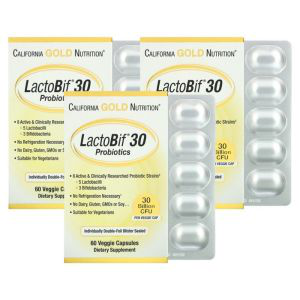

In [22]:
pil.open("data/test.png")

In [23]:
# 5개의 아이템 이미지 다운로드
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data.img)
    filename = f"data/{filename}.png"
    with open(filename, "wb") as file:
        file.write(response.content)

0 1 2 3 4 

In [24]:
os.listdir('data')

['000.png', '001.png', '002.png', '003.png', '004.png', 'test.png']

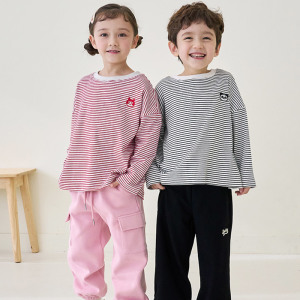

In [25]:
pil.open("data/003.png")

In [26]:
# data 디렉토리 삭제
import shutil
shutil.rmtree('data')